<a href="https://colab.research.google.com/github/molyntho/data_science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados obtidos aqui foram obtidos no site Inside Airbnb. Para as analises apresentadas, foi utilizado o arquivo:
* 	listings.csv	- Summary information and metrics for listings in London (good for visualisations).

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://data.insideairbnb.com/united-kingdom/england/london/2025-06-10/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

*   id - identificação numérica da unidade
*   name - nome da propriedade anunciada
*   host-id - número ID do proprietário(anfitrião)
*   host_name - nome do anfitrião
* neighbourhood_group -  sem valores válidos
* neighbourhood	- nome do bairro
* latitude	- coordenada de latitude da propriedade
* longitude	- coordenada de longitude da propriedade
* room_type	- tipo de quarto oferecido
* price	- preço para locação do imóvel
* minimum_nights	- quantidade mínima de noites para reservar
* number_of_reviews	- número de avaliações da propriedade
* last_review	- data da última avaliação
* reviews_per_month	- quantidade de avaliações por mes
* calculated_host_listings_count	- quantidade de imoveis do mesmo anfitrião
* availability_365	- número de dias de disponibilidade em 365 dias
* number_of_reviews_ltm	- número de avaliações
* license - sem dados válidos

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,264776,Huge Four Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44306,-0.01948,Entire home/apt,297.0,3,68,2025-05-28,0.51,11,293,12,NaN
1,264777,One Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44284,-0.01997,Entire home/apt,98.0,3,24,2024-12-11,0.22,11,318,4,NaN
2,264778,Two Bedroom Newly Refurbished Apartment,1389063,Sue,NaN,Lewisham,51.44359,-0.02275,Entire home/apt,148.0,3,58,2025-05-01,0.43,11,302,6,NaN
3,264779,Refurbished Two Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44355,-0.02309,Entire home/apt,144.0,3,36,2025-04-10,0.30,11,328,7,NaN
4,264780,Spacious refurbished 2 bedroom apt with balcony,1389063,Sue,NaN,Lewisham,51.44333,-0.02307,Entire home/apt,157.0,3,54,2024-12-29,0.35,11,255,4,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 96651
Variáveis:	 18



,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
license,1.000000
neighbourhood_group,1.000000
price,0.351440
reviews_per_month,0.260359
last_review,0.260359
host_name,0.000414
name,0.000000
id,0.000000
neighbourhood,0.000000
host_id,0.000000


### **Q3. Qual o tipo de distribuição das variáveis?**

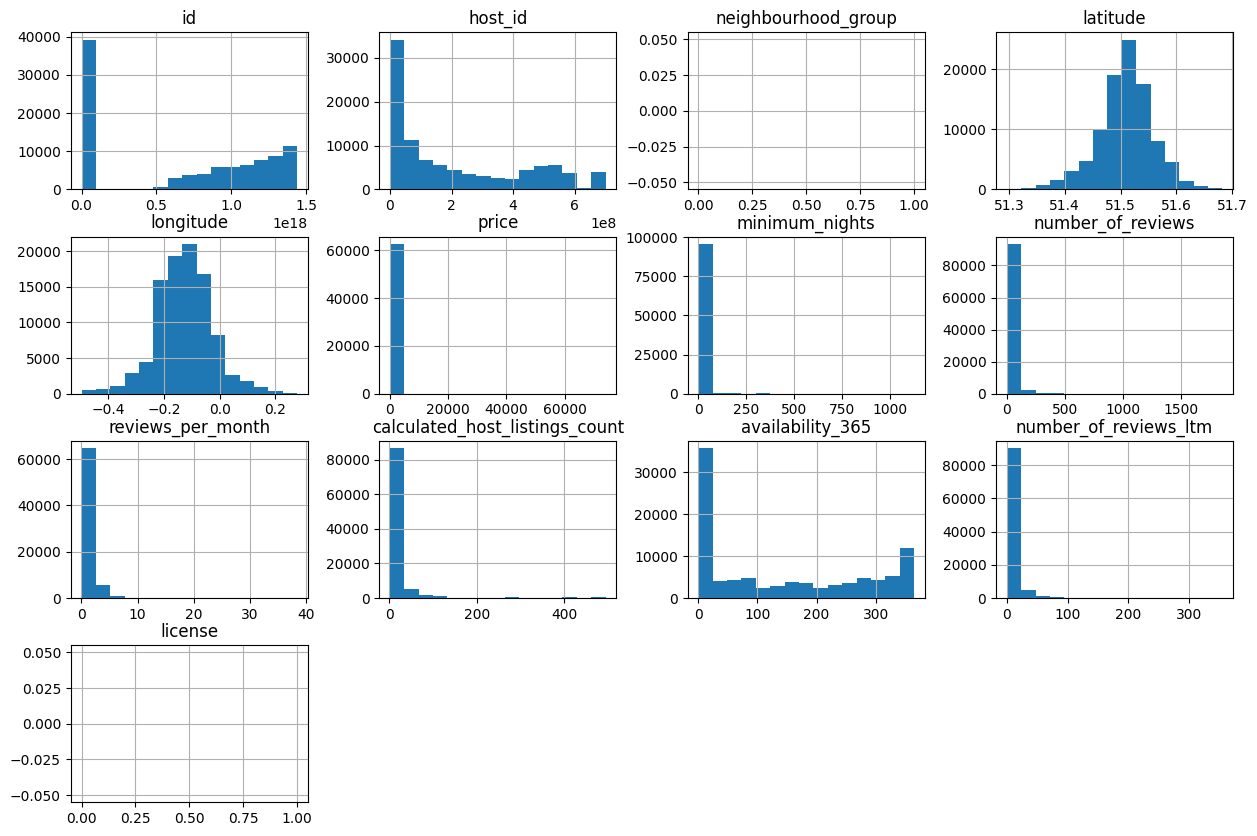

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **Q4. Qual a média dos preços de aluguel?**

In [20]:
# ver a média da coluna `price``
df.price.mean()


np.float64(213.36605832429328)

### **Q4. Qual a correlação existente entre as variáveis**

In [11]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()


# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.006820,-0.022809,-0.015134,0.059384,0.034486
minimum_nights,0.006820,1.000000,-0.031224,-0.055897,0.038237,0.030294
number_of_reviews,-0.022809,-0.031224,1.000000,0.527981,-0.051641,0.041437
reviews_per_month,-0.015134,-0.055897,0.527981,1.000000,0.000629,0.192679
calculated_host_listings_count,0.059384,0.038237,-0.051641,0.000629,1.000000,0.141496
availability_365,0.034486,0.030294,0.041437,0.192679,0.141496,1.000000


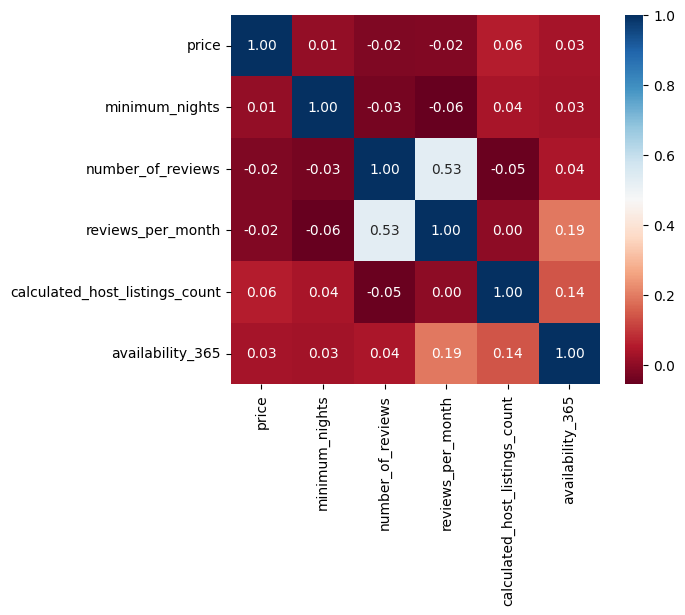

In [12]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [13]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

,count
room_type,
Entire home/apt,62456
Private room,33893
Shared room,191
Hotel room,111


In [14]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

,count
room_type,
Entire home/apt,0.646201
Private room,0.350674
Shared room,0.001976
Hotel room,0.001148


### **Q6. Qual a localidade mais cara de Londres?**



In [15]:
# ver preços por bairros, na média
df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10]

,price
neighbourhood,
City of London,379.090909
Lambeth,369.843623
Kensington and Chelsea,363.188002
Westminster,345.318295
Camden,231.094432
Islington,218.092201
Hammersmith and Fulham,193.992279
Wandsworth,189.820619
Richmond upon Thames,184.412060


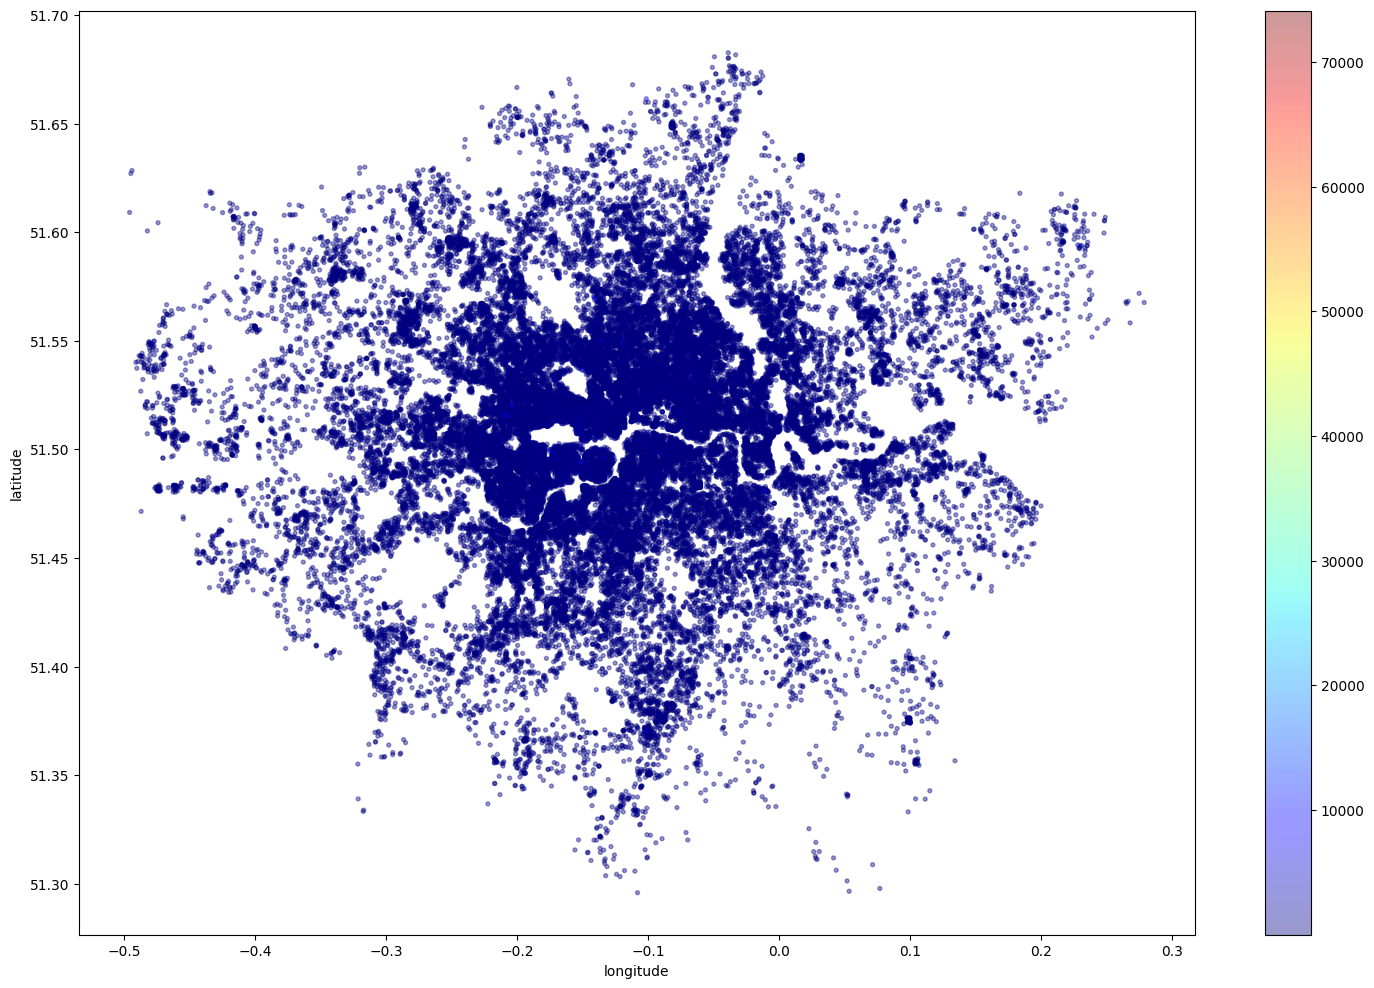

In [18]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(18,12));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [19]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()


np.float64(5.429504092042503)

## Conclusões


Foi realizada uma análise dos dados para a cidade de Londres, obtidos no site Inside Airbnb.

Na análise realizada foi encontrado 96651 entradas, com 18 variáveis, sendo que as variávies *license *e
*neighbourhood_group* não apresentavam dados para análise.

Foram encontrados outliers em algumas variáveis como *price, minimum_nights, number_of_reviews, reviews_per_month e calculated_host_listings_count. *

Foi realizado a análise de correlação, sendo identificada uma correlação negativa entre as variáveis.

Os tipos de imóveis disponíveis foram Entire home/apt	(62456) Private room	(33893), Shared room	(191) e Hotel room	(111), e a média dos preços foi de 213.36 libras, sendo que na City of London	foi de 379.09 libras, e em Brent	foi de 169.42 libras.




